# The Machine Learning model to predict the rate of spreading of the COVID-19 within India

In [1]:
import pandas as pd

The data-set used is from 'Our World in Data'. You can download the dataset from this link:https://github.com/owid/covid-19-data/tree/master/public/data

In [8]:
covid = pd.read_csv("dataset.csv")

In [4]:
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
0,AFG,Asia,Afghanistan,2019-12-31,0,0,0,0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
1,AFG,Asia,Afghanistan,2020-01-01,0,0,0,0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
2,AFG,Asia,Afghanistan,2020-01-02,0,0,0,0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
3,AFG,Asia,Afghanistan,2020-01-03,0,0,0,0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
4,AFG,Asia,Afghanistan,2020-01-04,0,0,0,0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5


In [5]:
covid.shape

(22452, 33)

In [7]:
# Looking how many locations are present
covid["location"].value_counts()

Czech Republic    160
Belarus           160
Estonia           160
Vietnam           160
Australia         160
                 ... 
Yemen              59
Western Sahara     43
Tajikistan         38
Comoros            37
Lesotho            24
Name: location, Length: 212, dtype: int64

In [9]:
# Description of categorical column
#include="O"  filter out all the categorical columns present in dataset
covid.describe(include="O")

,iso_code,continent,location,date,tests_units
count,22388,22228,22452,22452,7194
unique,211,6,212,160,4
top,MYS,Europe,Czech Republic,2020-05-15,tests performed
freq,160,6418,160,211,3073


In [10]:
#Checking for the NULL values in the datasets
covid.isna().any()

iso_code                            True
continent                           True
location                           False
date                               False
total_cases                        False
new_cases                          False
total_deaths                       False
new_deaths                         False
total_cases_per_million             True
new_cases_per_million               True
total_deaths_per_million            True
new_deaths_per_million              True
total_tests                         True
new_tests                           True
total_tests_per_thousand            True
new_tests_per_thousand              True
new_tests_smoothed                  True
new_tests_smoothed_per_thousand     True
tests_units                         True
stringency_index                    True
population                          True
population_density                  True
median_age                          True
aged_65_older                       True
aged_70_older   

In [11]:
#Getting the sum of null values at each column which basically tells us no. of NULL values present in each column
covid.isna().sum()

iso_code                              64
continent                            224
location                               0
date                                   0
total_cases                            0
new_cases                              0
total_deaths                           0
new_deaths                             0
total_cases_per_million              391
new_cases_per_million                391
total_deaths_per_million             391
new_deaths_per_million               391
total_tests                        16451
new_tests                          17086
total_tests_per_thousand           16451
new_tests_per_thousand             17086
new_tests_smoothed                 15856
new_tests_smoothed_per_thousand    15856
tests_units                        15258
stringency_index                    4656
population                            64
population_density                   934
median_age                          2079
aged_65_older                       2358
aged_70_older   

In [12]:
#Getting cases in INDIA
india_case = covid[covid["location"]=="India"]

In [13]:
india_case.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
9372,IND,Asia,India,2019-12-31,0,0,0,0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
9373,IND,Asia,India,2020-01-01,0,0,0,0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
9374,IND,Asia,India,2020-01-02,0,0,0,0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
9375,IND,Asia,India,2020-01-03,0,0,0,0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
9376,IND,Asia,India,2020-01-04,0,0,0,0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


In [14]:
india_case.tail()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
9526,IND,Asia,India,2020-06-03,207615,8909,5815,217,150.445,6.456,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
9527,IND,Asia,India,2020-06-04,216919,9304,6075,260,157.187,6.742,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
9528,IND,Asia,India,2020-06-05,226770,9851,6348,273,164.326,7.138,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
9529,IND,Asia,India,2020-06-06,236657,9887,6642,294,171.490,7.164,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
9530,IND,Asia,India,2020-06-07,246628,9971,6929,287,178.715,7.225,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


In [15]:
import seaborn as sns
from matplotlib import pyplot as plt

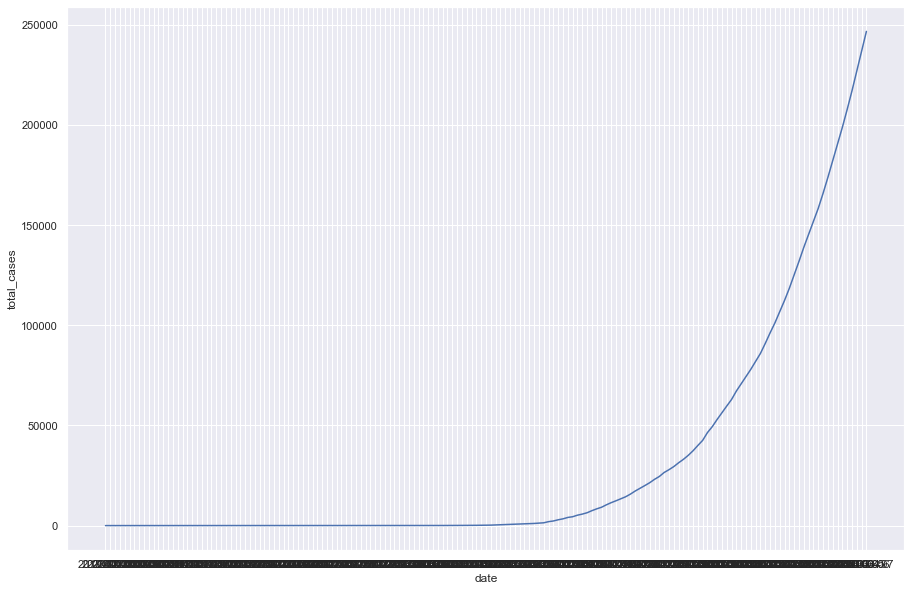

In [17]:
#Total cases per day
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="total_cases",data = india_case)
plt.show()

In [18]:
#Making a dataframe for last 1 month
India_last_month = india_case.tail(30)

In [19]:
India_last_month

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
9501,IND,Asia,India,2020-05-09,59662,3320,1981,95,43.233,2.406,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
9502,IND,Asia,India,2020-05-10,62939,3277,2109,128,45.608,2.375,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
9503,IND,Asia,India,2020-05-11,67152,4213,2206,97,48.661,3.053,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
9504,IND,Asia,India,2020-05-12,70756,3604,2293,87,51.272,2.612,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
9505,IND,Asia,India,2020-05-13,74281,3525,2415,122,53.827,2.554,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
9506,IND,Asia,India,2020-05-14,78003,3722,2549,134,56.524,2.697,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
9507,IND,Asia,India,2020-05-15,81970,3967,2649,100,59.398,2.875,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
9508,IND,Asia,India,2020-05-16,85940,3970,2752,103,62.275,2.877,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
9509,IND,Asia,India,2020-05-17,90927,4987,2872,120,65.889,3.614,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
9510,IND,Asia,India,2020-05-18,96169,5242,3029,157,69.687,3.799,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


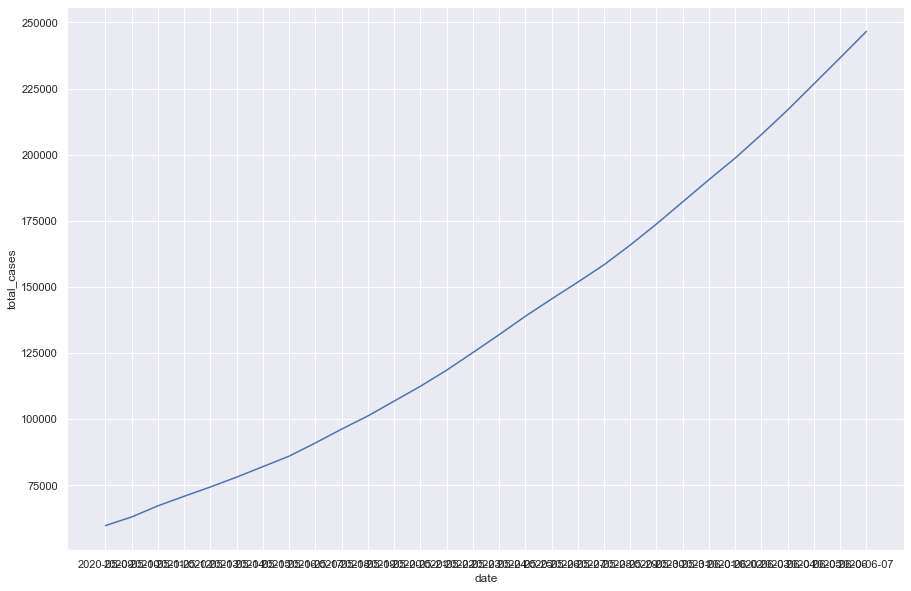

In [21]:
#Total cases in last month
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="total_cases",data = India_last_month)
plt.show()

In [39]:
#Comparing cases between INDIA, China and Pakistan
India_China_Pakistan = covid[(covid["location"]=="China") | (covid["location"]=="India")  | (covid["location"]=="Pakistan")].tail(30)     

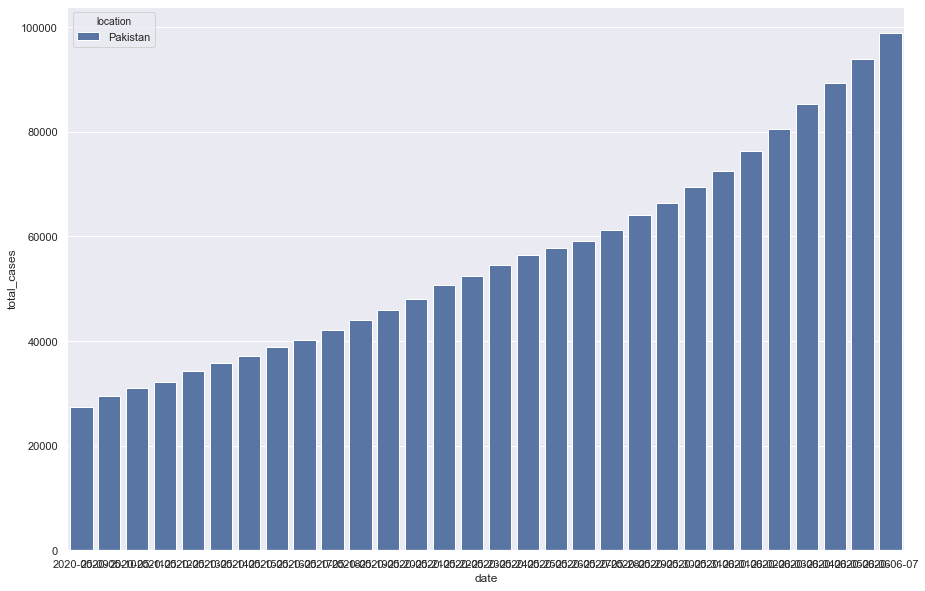

In [41]:
#Total cases per day
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="loacation",y="total_cases",data = India_China_Pakistan,hue="date")
plt.show()

In [44]:
#Getting last day data
last_day_data = covid[covid["date"] == "2020-06-07"]

In [45]:
last_day_data

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
149,AFG,Asia,Afghanistan,2020-06-07,19551,582,327,18,502.230,14.951,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500
240,ALB,Europe,Albania,2020-06-07,1232,20,34,1,428.105,6.950,...,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890
395,DZA,Africa,Algeria,2020-06-07,10050,115,698,8,229.185,2.623,...,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900
481,AND,Europe,Andorra,2020-06-07,852,0,51,0,11026.985,0.000,...,NaN,NaN,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN
559,AGO,Africa,Angola,2020-06-07,86,0,4,0,2.617,0.000,...,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22008,ESH,Africa,Western Sahara,2020-06-07,23,0,1,0,38.505,0.000,...,NaN,1.380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22067,YEM,Asia,Yemen,2020-06-07,473,4,112,1,15.859,0.134,...,2.922,1.583,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700
22148,ZMB,Africa,Zambia,2020-06-07,1154,43,7,0,62.772,2.339,...,2.480,1.542,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000
22227,ZWE,Africa,Zimbabwe,2020-06-07,279,14,4,0,18.772,0.942,...,2.822,1.882,1899.775,21.4,307.846,1.82,1.600,30.700,36.791,1.700


In [46]:
#Sorting last day data wrt to total cases
max_cases_country = last_day_data.sort_values(by="total_cases",ascending=False)

In [47]:
max_cases_country

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
22387,OWID_WRL,NaN,World,2020-06-07,6835723,129389,398636,3922,876.960,16.599,...,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705
21391,USA,North America,United States,2020-06-07,1920061,22223,109802,659,5800.742,67.138,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770
3040,BRA,South America,Brazil,2020-06-07,645771,30830,35026,1005,3038.073,145.042,...,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200
17024,RUS,Europe,Russia,2020-06-07,458689,8855,5725,197,3143.116,60.678,...,14.178,9.393,24765.954,0.1,431.297,6.18,23.400,58.300,NaN,8.050
21231,GBR,Europe,United Kingdom,2020-06-07,284868,1557,40465,204,4196.270,22.936,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.000,24.700,NaN,2.540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15937,PNG,Oceania,Papua New Guinea,2020-06-07,8,0,0,0,0.894,0.000,...,3.808,2.142,3823.194,NaN,561.494,17.65,23.500,48.800,NaN,NaN
3113,VGB,North America,British Virgin Islands,2020-06-07,8,0,1,0,264.577,0.000,...,NaN,NaN,NaN,NaN,NaN,13.67,NaN,NaN,NaN,NaN
2725,BES,North America,Bonaire Sint Eustatius and Saba,2020-06-07,7,0,0,0,266.962,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11831,LSO,Africa,Lesotho,2020-06-07,4,0,0,0,1.867,0.000,...,4.506,2.647,2851.153,59.6,405.126,3.94,0.400,53.900,2.117,NaN


In [52]:
#Top 10 affected countries
max_cases_country[1:10]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
21391,USA,North America,United States,2020-06-07,1920061,22223,109802,659,5800.742,67.138,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77
3040,BRA,South America,Brazil,2020-06-07,645771,30830,35026,1005,3038.073,145.042,...,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20
17024,RUS,Europe,Russia,2020-06-07,458689,8855,5725,197,3143.116,60.678,...,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05
21231,GBR,Europe,United Kingdom,2020-06-07,284868,1557,40465,204,4196.270,22.936,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54
9530,IND,Asia,India,2020-06-07,246628,9971,6929,287,178.715,7.225,...,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53
10559,ITA,Europe,Italy,2020-06-07,234801,270,33846,72,3883.459,4.466,...,23.021,16.240,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18
16126,PER,South America,Peru,2020-06-07,191758,4358,5301,139,5815.810,132.173,...,7.151,4.455,12236.706,3.5,85.755,5.95,4.8,NaN,NaN,1.60
7854,DEU,Europe,Germany,2020-06-07,183979,301,8668,22,2195.874,3.593,...,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.00
9843,IRN,Asia,Iran,2020-06-07,169425,2269,8209,75,2017.134,27.014,...,5.440,3.182,19082.620,0.2,270.308,9.59,0.8,21.1,NaN,1.50


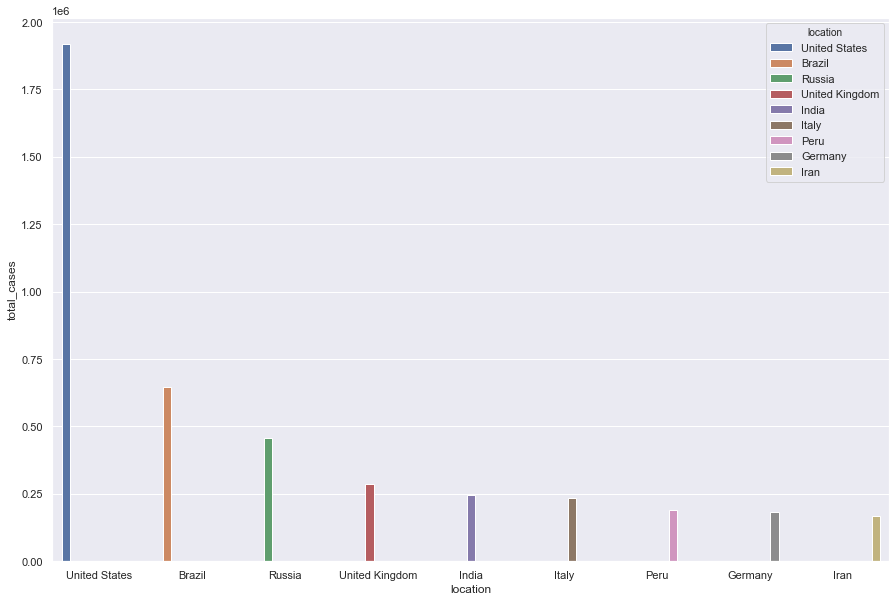

In [53]:
#Bar Plot for countries with top cases
sns.barplot(x = "location",y="total_cases",data=max_cases_country[1:10],hue="location")
plt.show()

In [55]:
#Converting string date to date_time
import datetime as dt
india_case['date'] = pd.to_datetime(india_case['date'])
india_case.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
9372,IND,Asia,India,2019-12-31,0,0,0,0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
9373,IND,Asia,India,2020-01-01,0,0,0,0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
9374,IND,Asia,India,2020-01-02,0,0,0,0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
9375,IND,Asia,India,2020-01-03,0,0,0,0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
9376,IND,Asia,India,2020-01-04,0,0,0,0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


In [56]:
#Converting date_time to ordinal
india_case['date'] = india_case['date'].map(dt.datetime.toordinal)
india_case.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
9372,IND,Asia,India,737424,0,0,0,0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
9373,IND,Asia,India,737425,0,0,0,0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
9374,IND,Asia,India,737426,0,0,0,0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
9375,IND,Asia,India,737427,0,0,0,0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
9376,IND,Asia,India,737428,0,0,0,0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


In [57]:
#Storing Dependent and Independent Variable
X = india_case['date']
y = india_case['total_cases']

In [58]:
#Splitting data into training and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [59]:
#Liner Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [60]:
import numpy as np
lr.fit(np.array(X_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
y_pred = lr.predict(np.array(X_test).reshape(-1,1))

In [67]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X_test,y_pred)

498921557535.35724